## Lead Score Case study
Business Objective : To identify  the most promising leads, i.e. the leads that are most likely to convert into paying customers. 

## Step 1 Importing and Reading data

In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the leads data file
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 2: Inspecting the Dataframe

In [3]:
# checking the number of rows and columns
df.shape

(9240, 37)

In [4]:
# checking the type of each coulmn
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
#checking the statiscal aspects of the dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 3 Data Preparation

In [6]:
#checking the first 10 entries of the data
df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


Within the data most of the categorical columns('Lead Profile,City etc) have field values as "Select". This is basically a by-default field within the application, whenever the user doesn't populate these fields while filling our forms.This is basically considered as missing fields in our case.

<b> Replacing 'Select' with the NaN <b>

In [7]:
#Replacing the Select field with NaN
df.replace(to_replace= "Select", value=np.nan,inplace=True)

In [8]:
#checking the missing or null values after replacing 'Select' with NaN as 
# NaN is also considered as missing values.
(df.isnull().sum()/len(df))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

<b> Dropping the columns with high missing values </b>

Based on above output, we can observe that most of the columnms have more than 45 % of missing values. Hence, considering 45% as cut off dropping those columns with high percentage.

In [9]:
#dropping columns with higher % of missing values
drop_cols = ['Asymmetrique Activity Index','Asymmetrique Profile Index',
            'Asymmetrique Activity Score','Asymmetrique Profile Score',
            'Lead Quality','Lead Profile','How did you hear about X Education']

df.drop(columns=drop_cols,axis=1,inplace=True)

In [10]:
df.shape

(9240, 30)

In [11]:
#rechecking the % of null values again to ensure all the missing value % is 
# less than 45%
round((df.isnull().sum()/len(df))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [12]:
# checking the data types in the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 

<b> checking the skewness in the categorical variables </b>

In [13]:
# checking for the unique values in the below categorical variables
# This step helps us to understand the skewness in the data.

vars_categorical = ['Lead Origin','Lead Source','Do Not Email','Do Not Call',
                   'Last Activity','Country','Specialization','What is your current occupation',
                   'What matters most to you in choosing a course','Tags','City',
                   'Last Notable Activity','I agree to pay the amount through cheque',
                   'A free copy of Mastering The Interview','Search','Magazine','Newspaper Article',
                    'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                    'Receive More Updates About Our Courses','Get updates on DM Content',
                   'Update me on Supply Chain Content',]

for i,j in enumerate(vars_categorical):
    print(df[j].value_counts(normalize=True))
    print()

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Live Chat            0.000217
Social Media         0.000217
blog                 0.000109
youtubechannel       0.000109
testone              0.000109
WeLearn              0.000109
welearnblog_Home     0.000109
Pay per Click Ads    0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

No     0.999784
Yes    0.000216
Name: Do Not Call, d

Following are the categorical fields that are skewed towards one of the value- <br>
1) Do Not Email - This column has 92% of No and 7% of Yes. We can drop this column too.<br>

2) Do Not Call -  This column has 95% of India and other 5% distributed among different countries. We can drop this column too.<br>

3) Country - This column has 99% of No and 1% of Yes. We can drop this column too.<br>

4) What matters most to you in choosing a course, I agree to pay the amount through cheque, A free copy of Mastering The Interview- These variables are also skewed and can be dropped.

5) Other skewed variables are- 'Receive More Updates About Our Courses','Through Recommendations','Digital Advertisement','X Education Forums','Newspaper Article','Magazine','Search','Update me on Supply Chain Content,'Get updates on DM Content','Newspaper'

In [14]:
#drop the columns with skewed data
drop_col2= ['Do Not Email','Do Not Call','Country','What matters most to you in choosing a course',
           'I agree to pay the amount through cheque','A free copy of Mastering The Interview',
           'Receive More Updates About Our Courses','Through Recommendations','Digital Advertisement',
            'X Education Forums','Newspaper Article','Magazine','Search',
           'Update me on Supply Chain Content','Get updates on DM Content',
           'Newspaper']

df.drop(columns=drop_col2, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
Prospect ID                        9240 non-null object
Lead Number                        9240 non-null int64
Lead Origin                        9240 non-null object
Lead Source                        9204 non-null object
Converted                          9240 non-null int64
TotalVisits                        9103 non-null float64
Total Time Spent on Website        9240 non-null int64
Page Views Per Visit               9103 non-null float64
Last Activity                      9137 non-null object
Specialization                     5860 non-null object
What is your current occupation    6550 non-null object
Tags                               5887 non-null object
City                               5571 non-null object
Last Notable Activity              9240 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 685.8+ KB


Based on the give metadata, we can observe that <br>
Prospect ID is 'A unique ID with which the customer is identified' and
Lead Number is 'A lead number assigned to each lead procured' <br>
In the given scenario, as we are mostly concerned to predict the lead conversion probability - "Lead number" makes more sense to retain in the data. And Prospect ID will be a redudant data of this lead number. Hence, we can drop the Lead Number.

Also the Tags column represent after calling lead what is there status employess got from them, like they will comback or they are decide or they are doing other courses. As this all information are after calling lead we can ignore this column.

In [15]:
#dropping prospect ID
df.drop(columns=['Prospect ID','Tags'],axis=1,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
Lead Number                        9240 non-null int64
Lead Origin                        9240 non-null object
Lead Source                        9204 non-null object
Converted                          9240 non-null int64
TotalVisits                        9103 non-null float64
Total Time Spent on Website        9240 non-null int64
Page Views Per Visit               9103 non-null float64
Last Activity                      9137 non-null object
Specialization                     5860 non-null object
What is your current occupation    6550 non-null object
City                               5571 non-null object
Last Notable Activity              9240 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 613.7+ KB


In [16]:
# checking for the unique values in the below categorical variables
# This step helps us to understand the skewness in the data.

vars_categorical = ['Lead Origin','Lead Source',
                   'Last Activity','Specialization','What is your current occupation',
                   'City','Last Notable Activity']

for i,j in enumerate(vars_categorical):
    print("Column name : ", j)
    print(df[j].value_counts(normalize=True)*100)
    print()

Column name :  Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

Column name :  Lead Source
Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Live Chat             0.021730
Social Media          0.021730
blog                  0.010865
youtubechannel        0.010865
testone               0.010865
WeLearn               0.010865
welearnblog_Home      0.010865
Pay per Click Ads     0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

Column name :  Last Activity
Email Opene

<b>1. Lead Origin </b>

In [17]:
#imputing lower % values in the columns with other
df['Lead Origin'].replace(to_replace="Lead Add Form",value='other_form',inplace=True)
df['Lead Origin'].replace(to_replace="Lead Import",value='other_form',inplace=True)
df['Lead Origin'].replace(to_replace="Quick Add Form",value='other_form',inplace=True)

In [18]:
df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
other_form                  774
Name: Lead Origin, dtype: int64

<b> 2. Lead Source <b>

In [19]:
#for lead source
impute_list = ['Reference','Welingak Website',    
'Referral Sites','Facebook','bing','google','Click2call','Live Chat',
'Social Media','Press_Release','welearnblog_Home','Pay per Click Ads',
'testone','NC_EDM','youtubechannel','WeLearn','blog']

for i in impute_list:
    df['Lead Source'].replace(to_replace=i,value='other_references',inplace=True)

In [20]:
df['Lead Source'].value_counts()

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
other_references     884
Name: Lead Source, dtype: int64

<b> 3. Last activity </b>

In [21]:
# for last activity
impute_list1 = ['Page Visited on Website','Converted to Lead',
               'Email Bounced','Email Link Clicked','Form Submitted on Website',
               'Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
               'View in browser link Clicked','Email Received','Email Marked Spam',
               'Visited Booth in Tradeshow','Resubscribed to emails']

for i in impute_list1:
    df['Last Activity'].replace(to_replace=i,value='other_links',inplace=True)

In [22]:
df['Last Activity'].value_counts()

Email Opened               3437
SMS Sent                   2745
other_links                1982
Olark Chat Conversation     973
Name: Last Activity, dtype: int64

<b> 4. City </b>

In [23]:
#for city variable
a = df['City'].value_counts().index.tolist()
b = df['City'].value_counts(normalize=True).tolist()

for i in range(len(a)):
    if (b[i] < 0.10):
        df['City'].replace(to_replace=a[i],value='New_Cities',inplace=True)
        
df['City'].value_counts(normalize=True)

Mumbai               0.578352
New_Cities           0.163525
Thane & Outskirts    0.134985
Other Cities         0.123138
Name: City, dtype: float64

<b> 5. What is your current occupation </b>

In [24]:
# for what is your current position variable
df['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [25]:
impute_list3 = ['Student','Other','Housewife','Businessman']
for i in impute_list3:
    df['What is your current occupation'].replace(to_replace=i,value='other_professions',inplace=True)
   
df['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
other_professions        3.725191
Name: What is your current occupation, dtype: float64

<b> 6. Last Notable Activity </b>

In [26]:
# for Last Notable Activity
a1 = df['Last Notable Activity'].value_counts().index.tolist()
b1 = df['Last Notable Activity'].value_counts(normalize=True).tolist()

for i in range(len(a1)):
    if (b1[i] < 0.10):
        df['Last Notable Activity'].replace(to_replace=a1[i],value='other',inplace=True)

In [27]:
df['Last Notable Activity'].value_counts(normalize=True)

Modified        0.368723
Email Opened    0.305952
SMS Sent        0.235065
other           0.090260
Name: Last Notable Activity, dtype: float64

<b> 7. Specialization </b>

In [28]:
# for variable 'Specialization' we can group those categories with less that <5% into 'other' group
# for Last Notable Activity
a2 = df['Specialization'].value_counts().index.tolist()
b2 = df['Specialization'].value_counts(normalize=True).tolist()

for i in range(len(a2)):
    if (b2[i] < 0.10 ):
        df['Specialization'].replace(to_replace=a2[i],value='other_specialization',inplace=True)
        
df['Specialization'].value_counts(normalize=True)*100

other_specialization         54.573379
Finance Management           16.655290
Human Resource Management    14.470990
Marketing Management         14.300341
Name: Specialization, dtype: float64

In [29]:
# checking the variables that are retailed after dropping and imputing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
Lead Number                        9240 non-null int64
Lead Origin                        9240 non-null object
Lead Source                        9204 non-null object
Converted                          9240 non-null int64
TotalVisits                        9103 non-null float64
Total Time Spent on Website        9240 non-null int64
Page Views Per Visit               9103 non-null float64
Last Activity                      9137 non-null object
Specialization                     5860 non-null object
What is your current occupation    6550 non-null object
City                               5571 non-null object
Last Notable Activity              9240 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 613.7+ KB


<b> Handling missing values in the columns retained as above </b>

In [30]:
#checking the missing values again for the 12 columns
(df.isnull().sum()/len(df))*100

Lead Number                         0.000000
Lead Origin                         0.000000
Lead Source                         0.389610
Converted                           0.000000
TotalVisits                         1.482684
Total Time Spent on Website         0.000000
Page Views Per Visit                1.482684
Last Activity                       1.114719
Specialization                     36.580087
What is your current occupation    29.112554
City                               39.707792
Last Notable Activity               0.000000
dtype: float64

Now we observe the missing values in the following columns. These are important variables and we could replace the missing values either with mode, meadian or mean.

<b> 1. Imputing missing values in Lead Source </b>

In [31]:
# imputing the missing values in the column-Lead Source
df['Lead Source'].value_counts(normalize=True)

Google              0.311604
Direct Traffic      0.276293
Olark Chat          0.190678
Organic Search      0.125380
other_references    0.096045
Name: Lead Source, dtype: float64

Around 31% Lead source belong to Google. Accrdingly, we can impute the term 'Google' in place of NAN values.

In [32]:
# imputing the 'Lead Source' missing value with mode 'Google'
df['Lead Source']= df['Lead Source'].fillna('Google')
df['Lead Source'].value_counts()

Google              2904
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
other_references     884
Name: Lead Source, dtype: int64

<b> 2. Imputing missing values in Total Visits </b>

In [33]:
#imputing values in the TotalVisits column
df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

The above statistical description indicates that while the mean is 3.4 , the max values is 251. Therefore, it would be appropriate to replace the missing values with median

In [34]:
# Since Total Visits column is of numeric-Float type. 
# we are imputing the values with Mean values
median = df['TotalVisits'].median()
df['TotalVisits']= df['TotalVisits'].fillna(median)

df['TotalVisits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

<b> 3. Imputing missing values in  'Page Views Per Visit' </b>

In [35]:
#imputing the missing values in 'Pages Views per Visit'
df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

The above statistical description indicates that while the mean is 2.3 , the max values is 55. Therefore, it would be appropriate to replace the missing values with median

In [36]:
# Since Total Visits column is of numeric-Float type. 
# we are imputing the values with Median values
median = df['Page Views Per Visit'].median()
df['Page Views Per Visit']= df['Page Views Per Visit'].fillna(median)

df['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<b>4. Imputing missing values in 'LastAcitivity' </b>

In [37]:
#imputing the values in the 'Last Activity column'
df['Last Activity'].value_counts(normalize=True)

Email Opened               0.376163
SMS Sent                   0.300427
other_links                0.216920
Olark Chat Conversation    0.106490
Name: Last Activity, dtype: float64

Here we 37% of. activity belongs to email opened. so we can replace the missing valuws with email opened

In [38]:
#imputing with mode
df['Last Activity']=df['Last Activity'].fillna('Email Opened')

df['Last Activity'].value_counts()

Email Opened               3540
SMS Sent                   2745
other_links                1982
Olark Chat Conversation     973
Name: Last Activity, dtype: int64

<b> 5. Imputing missing values in 'Specialization' </b> 

In [39]:
# imputing the values in the Specializtion column
round(df['Specialization'].value_counts(normalize=True)*100,2)

other_specialization         54.57
Finance Management           16.66
Human Resource Management    14.47
Marketing Management         14.30
Name: Specialization, dtype: float64

Specialization column basically provides the information on to which domain the customer belongs to.The missing value % in this column is 36.5% and imputing theis with other

In [40]:
# filling the missing values in teh specialization column with NA
df['Specialization'] = df['Specialization'].fillna('other_specialization')
df['Specialization'].value_counts(normalize=True)

other_specialization         0.711905
Finance Management           0.105628
Human Resource Management    0.091775
Marketing Management         0.090693
Name: Specialization, dtype: float64

<b>6. Imputing missing values in 'What is your current occupation' </b> 

In [41]:
# imputing missing values in the 'What is your current occupation' column
print("Stats \n",df['What is your current occupation'].describe())

print('\n\n',df['What is your current occupation'].value_counts())

Stats 
 count           6550
unique             3
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object


 Unemployed              5600
Working Professional     706
other_professions        244
Name: What is your current occupation, dtype: int64


This column represents the occupation of the lead now imputing this the mode might create inaccuracies while building predicting model.Hence, we can impute the missing values with 'missing'

In [42]:
# filling the missing values in teh What is your current occupation column with missing
df['What is your current occupation'] = df['What is your current occupation'].fillna('missing')
df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.606061
missing                 0.291126
Working Professional    0.076407
other_professions       0.026407
Name: What is your current occupation, dtype: float64

<b>7. Imputing missing values in 'City'</b> 

In [43]:
# imputing the missing values in teh city column
print(df['City'].describe())
print('\n\n',df['City'].value_counts())

count       5571
unique         4
top       Mumbai
freq        3222
Name: City, dtype: object


 Mumbai               3222
New_Cities            911
Thane & Outskirts     752
Other Cities          686
Name: City, dtype: int64


In [44]:
# imputing missing value with second highest count- 'other'
df['City'] = df['City'].fillna('other')
df['City'].value_counts()

other                3669
Mumbai               3222
New_Cities            911
Thane & Outskirts     752
Other Cities          686
Name: City, dtype: int64

In [45]:
# since other and other cities implies the same changing other to other cities
df['City'].replace(to_replace="other",value="Other Cities",inplace=True)
df['City'].value_counts()

Other Cities         4355
Mumbai               3222
New_Cities            911
Thane & Outskirts     752
Name: City, dtype: int64

<b> Rechecking the missing values after imputing with mean/median/mode in the above steps</b>

In [46]:
(df.isnull().sum()/len(df))*100

Lead Number                        0.0
Lead Origin                        0.0
Lead Source                        0.0
Converted                          0.0
TotalVisits                        0.0
Total Time Spent on Website        0.0
Page Views Per Visit               0.0
Last Activity                      0.0
Specialization                     0.0
What is your current occupation    0.0
City                               0.0
Last Notable Activity              0.0
dtype: float64

In [47]:
#checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
Lead Number                        9240 non-null int64
Lead Origin                        9240 non-null object
Lead Source                        9240 non-null object
Converted                          9240 non-null int64
TotalVisits                        9240 non-null float64
Total Time Spent on Website        9240 non-null int64
Page Views Per Visit               9240 non-null float64
Last Activity                      9240 non-null object
Specialization                     9240 non-null object
What is your current occupation    9240 non-null object
City                               9240 non-null object
Last Notable Activity              9240 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 613.7+ KB


<b> Data type conversion </b>

In [48]:
#changing the object type for TotalVisits,Page views per visit

# Total Visits should be converted to int asthis indicates the- 'The total time spent by the customer on the website'
df['TotalVisits'] = df['TotalVisits'].astype(int)
df['Page Views Per Visit'] = df['Page Views Per Visit'].astype(int)

#checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
Lead Number                        9240 non-null int64
Lead Origin                        9240 non-null object
Lead Source                        9240 non-null object
Converted                          9240 non-null int64
TotalVisits                        9240 non-null int32
Total Time Spent on Website        9240 non-null int64
Page Views Per Visit               9240 non-null int32
Last Activity                      9240 non-null object
Specialization                     9240 non-null object
What is your current occupation    9240 non-null object
City                               9240 non-null object
Last Notable Activity              9240 non-null object
dtypes: int32(2), int64(3), object(7)
memory usage: 541.5+ KB


# Step 4  Visualizing the data

In [49]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
Converted_lead = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted_lead

38.53896103896104

<b> for categorical variables </b>

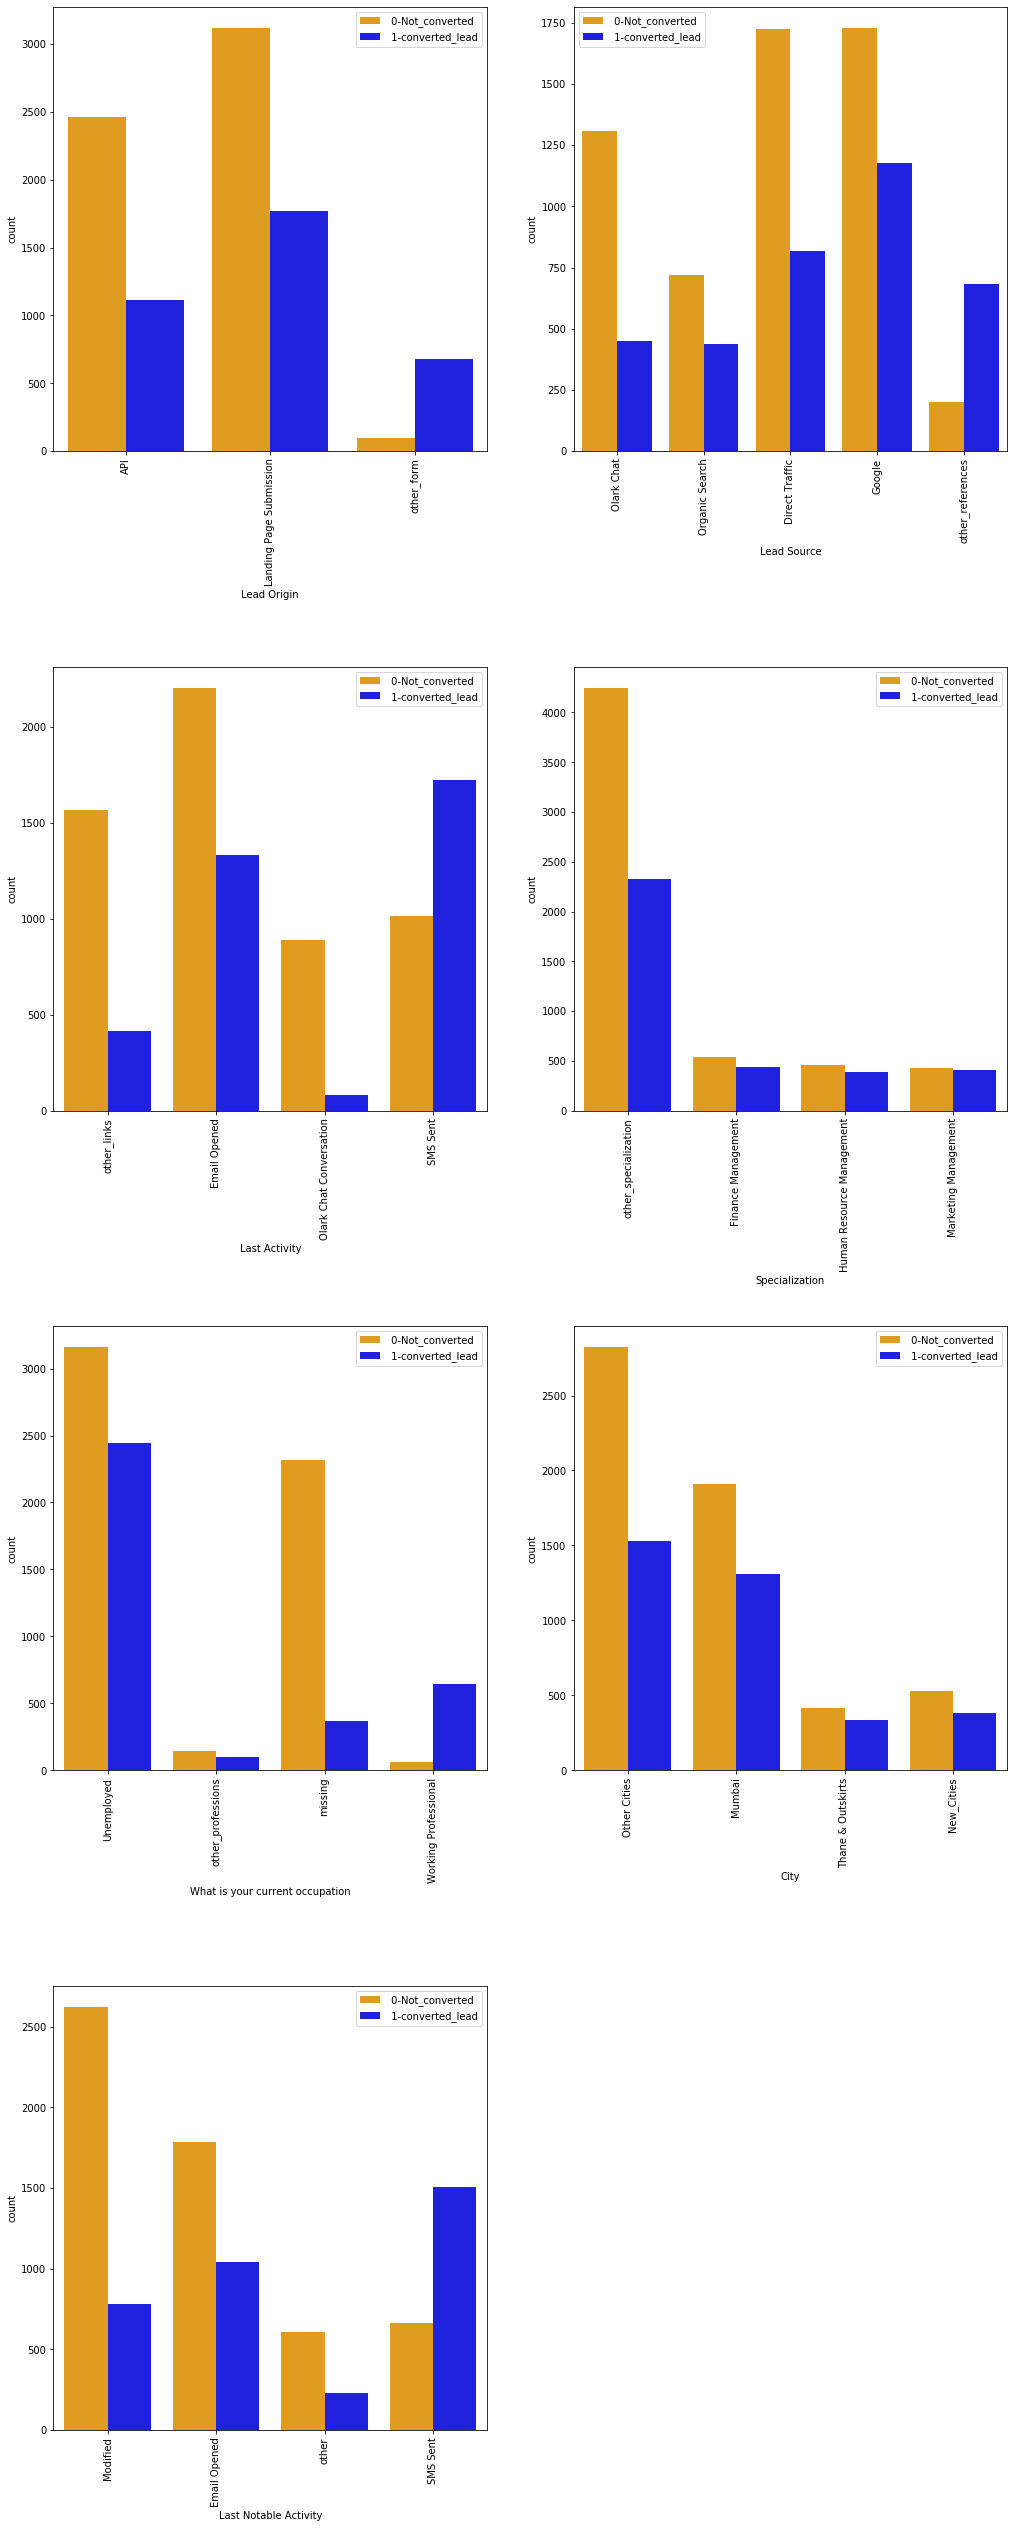

In [50]:
#for categorical variables
categories = ['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation','City',
       'Last Notable Activity']                          

plt.figure(figsize = (15,35))
palette_colors = {0: "orange", 1: "blue"}
for i in enumerate(categories):
    plt.subplot(4,2,i[0]+1)
    plt.tight_layout(pad=4.0)
    sns.countplot(x=i[1],hue='Converted',data=df,palette=palette_colors)
    plt.legend([' 0-Not_converted',' 1-converted_lead'])
    plt.xticks(rotation=90)
plt.show()

Interpretation :
1. Lead Origin : API and Landing Page Submission have more conversion rate as compared to others. However, Lead Add Form has max conversion rate but count of lead are not very high.
2. Lead Source: Google and Direct traffic generates maximum number of leads.
3. Last_activity and Last Notable activity : The conversion of sms sent is very high.
4. What is your current occupation : The conversion rate of working professionals are high

<b> for numeric variables </b>

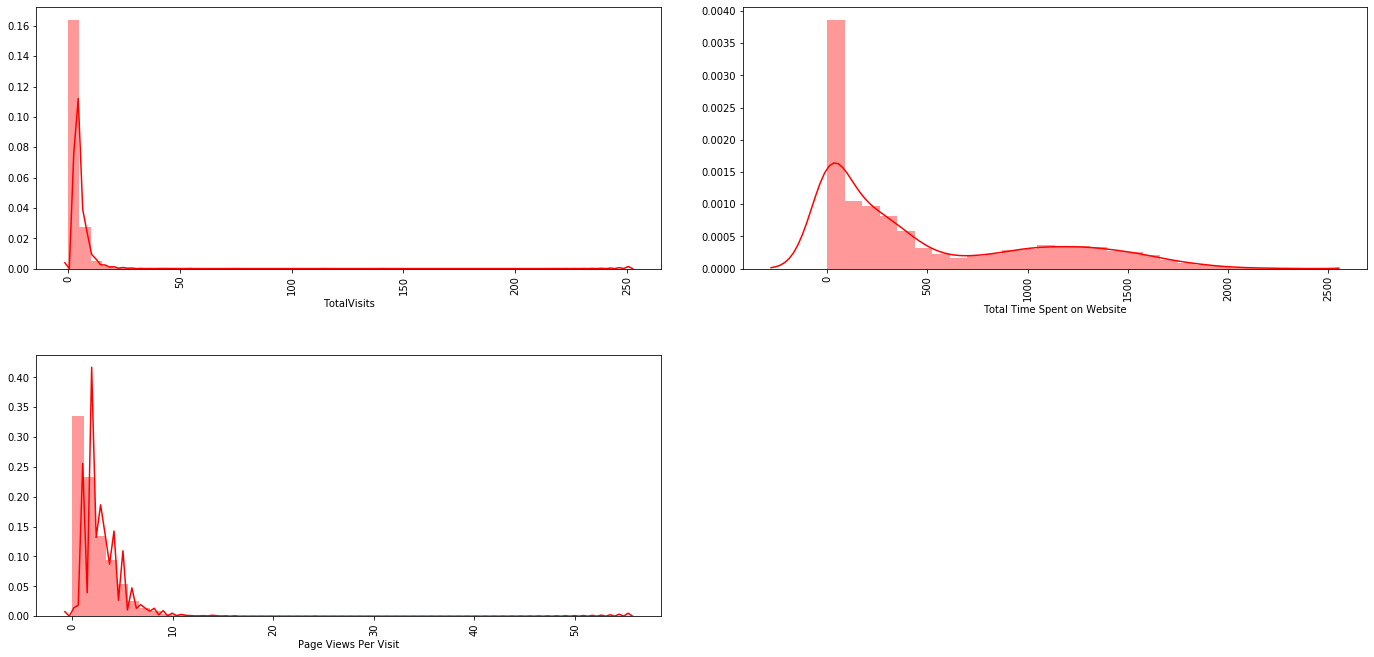

In [51]:
numeric = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']                          

plt.figure(figsize=(20,10))  
for i in enumerate (numeric):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(df[i[1]], hist = True , color = 'r')
    plt.tight_layout(pad=4.0)
    plt.xticks(rotation = 90)

<b> Heat map to understand corelation of the variables <b>

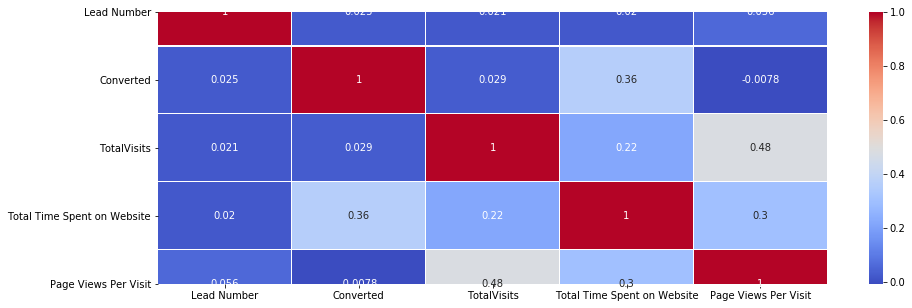

In [52]:
plt.figure(figsize = (15,5))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', linecolor = 'white', linewidths=0.1)

## Step 5 Data preparation - creating Dummy variables for categorical variables 

<b>For categorical variables with multiple levels, create dummy variable(one-hot encoded) <b>

In [53]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_other_form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_other_references,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_other_links,Specialization_Human Resource Management,...,Specialization_other_specialization,What is your current occupation_Working Professional,What is your current occupation_missing,What is your current occupation_other_professions,City_New_Cities,City_Other Cities,City_Thane & Outskirts,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_other
0,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [54]:
# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)
df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_other_specialization,What is your current occupation_Working Professional,What is your current occupation_missing,What is your current occupation_other_professions,City_New_Cities,City_Other Cities,City_Thane & Outskirts,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_other
0,660737,API,Olark Chat,0,0,0,0,other_links,other_specialization,Unemployed,...,1,0,0,0,0,1,0,1,0,0
1,660728,API,Organic Search,0,5,674,2,Email Opened,other_specialization,Unemployed,...,1,0,0,0,0,1,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2,1532,2,Email Opened,other_specialization,other_professions,...,1,0,0,1,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1,305,1,other_links,other_specialization,Unemployed,...,1,0,0,0,0,0,0,1,0,0
4,660681,Landing Page Submission,Google,1,2,1428,1,other_links,other_specialization,Unemployed,...,1,0,0,0,0,0,0,1,0,0


In [55]:
#Dropping the repated variable
df.drop(columns=['Lead Origin','Lead Source','Last Activity',
                'Specialization','What is your current occupation',
                'City','Last Notable Activity'],axis=1,inplace=True)
df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_other_form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_other_specialization,What is your current occupation_Working Professional,What is your current occupation_missing,What is your current occupation_other_professions,City_New_Cities,City_Other Cities,City_Thane & Outskirts,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_other
0,660737,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,660728,0,5,674,2,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
2,660727,1,2,1532,2,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,660719,0,1,305,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,660681,1,2,1428,1,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
Lead Number                                             9240 non-null int64
Converted                                               9240 non-null int64
TotalVisits                                             9240 non-null int32
Total Time Spent on Website                             9240 non-null int64
Page Views Per Visit                                    9240 non-null int32
Lead Origin_Landing Page Submission                     9240 non-null uint8
Lead Origin_other_form                                  9240 non-null uint8
Lead Source_Google                                      9240 non-null uint8
Lead Source_Olark Chat                                  9240 non-null uint8
Lead Source_Organic Search                              9240 non-null uint8
Lead Source_other_references                            9240 non-null uint8
Last Activity_Olark Chat Conversation                   9

##  Step 6 Outlier Analysis 

In [57]:
# checking fo routlier analysis in continuous variables-i.e.TotalVisits,
#Total Time spent on website,Page views per visit
numeric = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit'] 


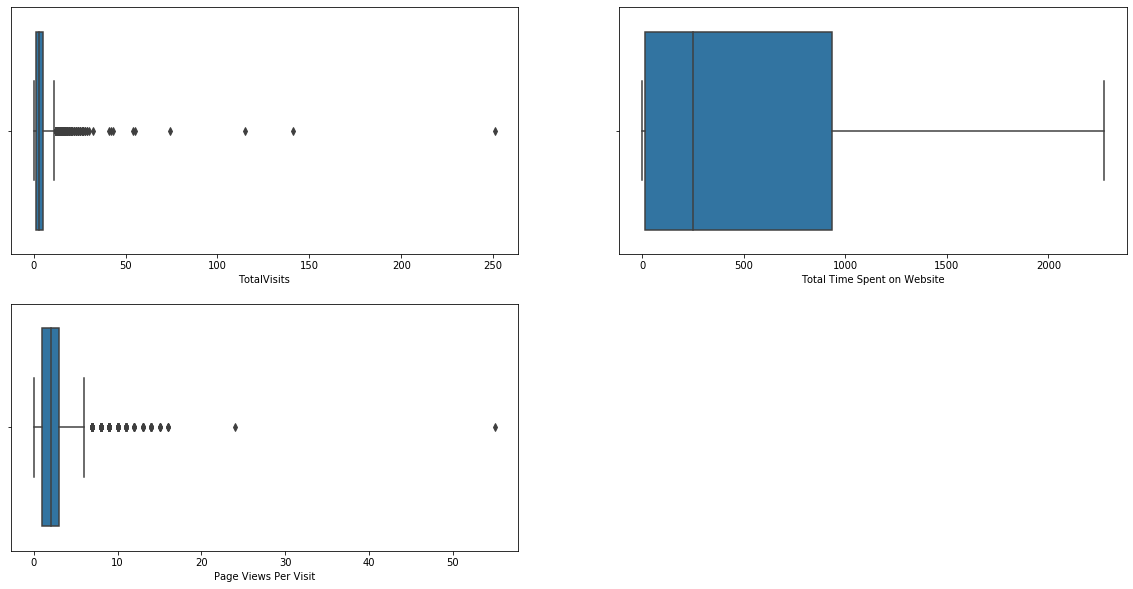

In [58]:
# Looking at the outliers
plt.figure(figsize = (20,10))
for i in enumerate(numeric):
    plt.subplot(2,2, i[0]+1)
    sns.boxplot(df[i[1]])

In [59]:
#checking the outliers at 25%, 50%, 75%, 90%,95% and 99%
numeric = df[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']]
numeric.describe(percentiles=[.25,.5,.75,.90,.95,.98,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.289286
std,4.819024,548.021466,2.150012
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
98%,13.000000,1734.000000,8.000000


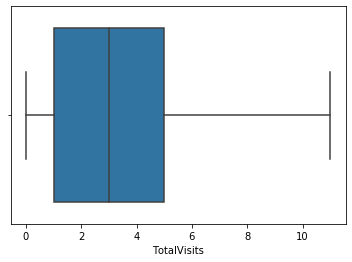

In [60]:
# capping the outeliers for Total Visits 
q = df['TotalVisits'].quantile(0.97)
df['TotalVisits'][df['TotalVisits']>=q] = q
sns.boxplot(df['TotalVisits'])

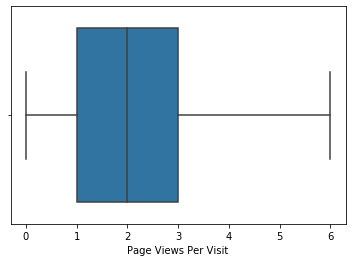

In [61]:
# capping the outeliers for Page Views Per Visit
q = df['Page Views Per Visit'].quantile(0.96)
df['Page Views Per Visit'][df['Page Views Per Visit']>=q] = q
sns.boxplot(df['Page Views Per Visit'])

In [62]:
# final variables in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
Lead Number                                             9240 non-null int64
Converted                                               9240 non-null int64
TotalVisits                                             9240 non-null int32
Total Time Spent on Website                             9240 non-null int64
Page Views Per Visit                                    9240 non-null int32
Lead Origin_Landing Page Submission                     9240 non-null uint8
Lead Origin_other_form                                  9240 non-null uint8
Lead Source_Google                                      9240 non-null uint8
Lead Source_Olark Chat                                  9240 non-null uint8
Lead Source_Organic Search                              9240 non-null uint8
Lead Source_other_references                            9240 non-null uint8
Last Activity_Olark Chat Conversation                   9

##  Step 7 Test Train split

In [63]:
# importing the libraries 
from sklearn.model_selection import train_test_split

In [64]:
# keeping the feature variable to X
X = df.drop(['Converted','Lead Number'],axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_other_form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_other_references,Last Activity_Olark Chat Conversation,...,Specialization_other_specialization,What is your current occupation_Working Professional,What is your current occupation_missing,What is your current occupation_other_professions,City_New_Cities,City_Other Cities,City_Thane & Outskirts,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_other
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1,5,674,2,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,2,1532,2,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,1,305,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,2,1428,1,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [65]:
#putting the reponse variable to y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [66]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

## Step 8 Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [68]:
X_train[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_other_form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_other_references,Last Activity_Olark Chat Conversation,...,Specialization_other_specialization,What is your current occupation_Working Professional,What is your current occupation_missing,What is your current occupation_other_professions,City_New_Cities,City_Other Cities,City_Thane & Outskirts,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_other
1871,-1.122305,-0.885371,-1.225418,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6795,0.275215,0.005716,-0.662891,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3516,0.624595,-0.691418,-0.100364,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
8105,0.624595,1.365219,1.587217,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3934,-1.122305,-0.885371,-1.225418,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [69]:
## checking the conversion rate

conversion = (sum(df['Converted'])/len(df['Converted'].index))*100
conversion

38.53896103896104

We have almost 39% conversion

##  Step 9 Looking at Correlations

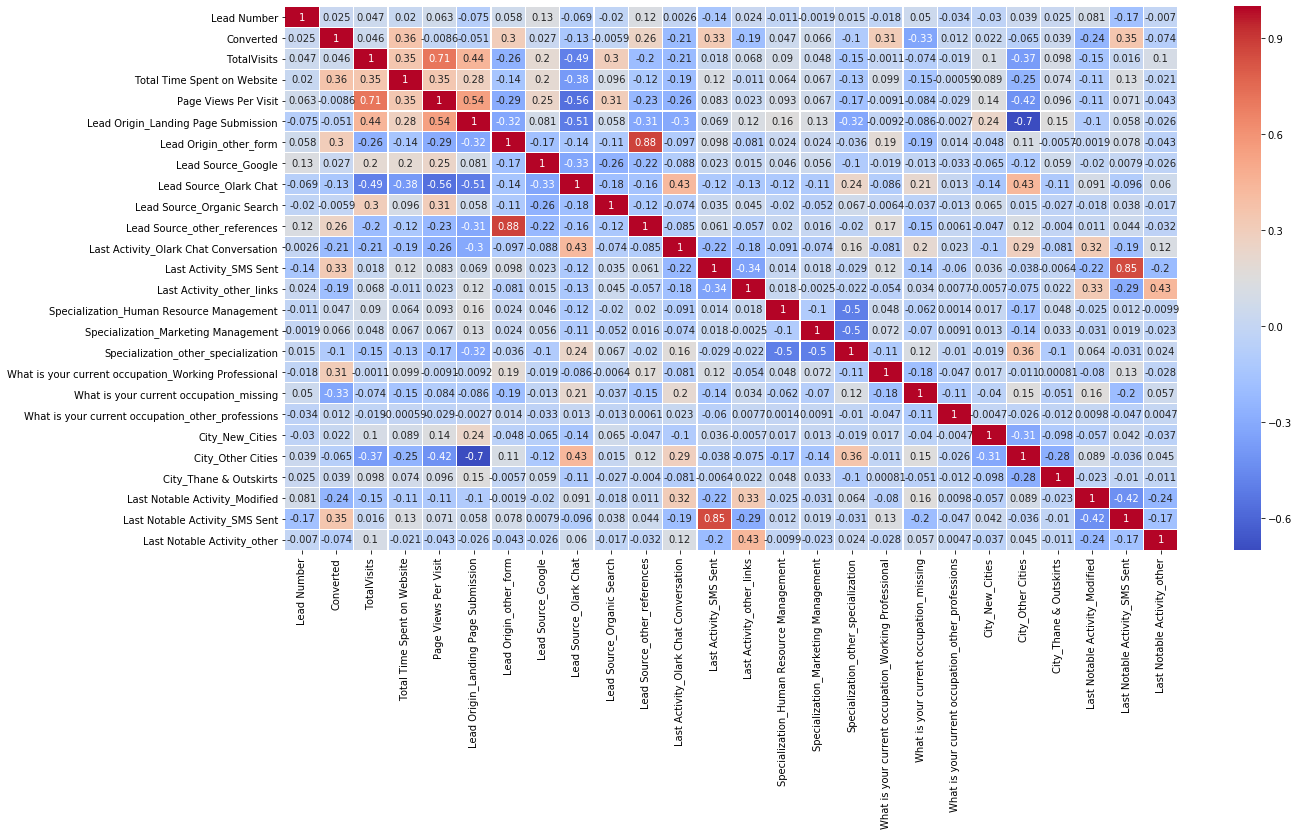

In [70]:
#plotting correlation matrix
plt.figure(figsize = (20,10))
ax=sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', linecolor = 'white', linewidths=0.1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

<b> Dropping the highly correlated dummy variable </b>

In [71]:
X_test = X_test.drop(['Lead Origin_other_form','Last Activity_SMS Sent' ], 1)
X_train = X_train.drop(['Lead Origin_other_form','Last Activity_SMS Sent' ], 1)

<b> checking corrleation matrix again </b>

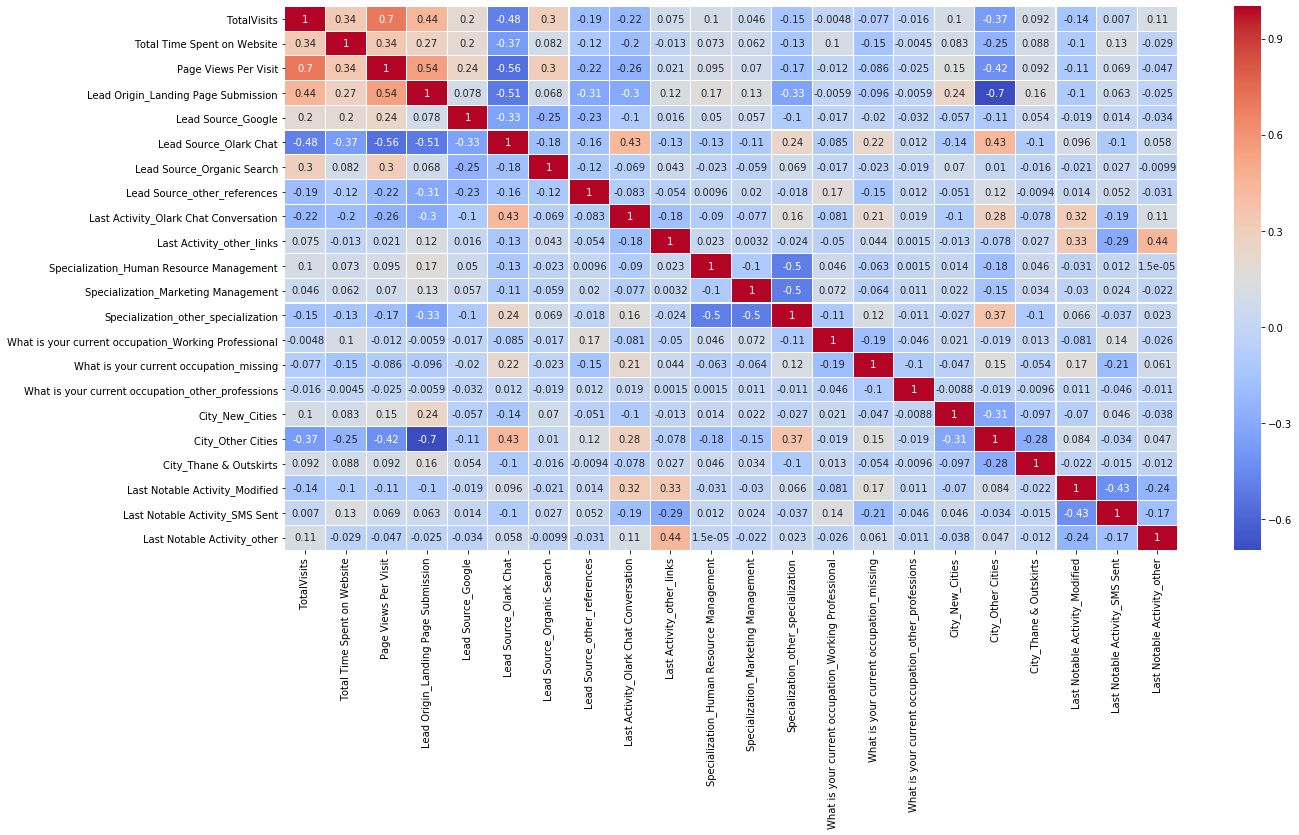

In [72]:
plt.figure(figsize = (20,10))
ax=sns.heatmap(X_train.corr(),annot = True, cmap = 'coolwarm', linecolor = 'white', linewidths=0.1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## Step 10 Model Building

 <h3> Feature Selection using RFE </h3>

In [73]:
# import and instantiate Logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [74]:
# Selecting the top 20 top features
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train,y_train)

In [75]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True])

In [76]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_other_references', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_other_links', True, 1),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_other_specialization', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('What is your current occupation_missing', True, 1),
 ('What is your current occupation_other_professions', True, 1),
 ('City_New_Cities', True, 1),
 ('City_Other Cities', True, 1),
 ('City_Thane & Outskirts', False, 3),
 ('Last Notable Activity_Modified', False, 2),
 ('Last Notable Activity_SMS Sent', True, 1),
 ('Last Notable Activity_other', True, 1)]

In [77]:
#copying all the rfe columns into 'col'
col = X_train.columns[rfe.support_]

In [78]:
# columns which are unselected by RFE are

X_train.columns[~rfe.support_]

Index(['City_Thane & Outskirts', 'Last Notable Activity_Modified'], dtype='object')

Now for further fine tuning we'll select those variables which are selected by RFE and store in 'col'

<h3> Assessing the model with StatsModels </b>

<h3> Model 1

In [79]:
import statsmodels.api as sm
# including the above featured values to build statmodel

#adding constant to train set
X_train_sm = sm.add_constant(X_train[col])

#building the model again and fitting the model
logm1 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2696.0
Date:                Mon, 07 Sep 2020   Deviance:                       5392.1
Time:                        20:39:46   Pearson chi2:                 6.61e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2889      0.178     -1.621      0.105      -0.638       0.060
TotalVisits                                              0.2153      0.049      4.357      0.000       0.118       0.312
Total Time Spent on Website                              1.0324      0.040     26.047      0.000       0.955       1.110
Page Views Per Visit                                    -0.3768      0.054     -6.918      0.000      -0.484      -0.270
Lead Origin_Landing Page Submission                     -0.6157      0.122     -5.053      0.000      -0.854      -0.377
Lead Source_Google                                       0.4094      0.097      4.228      0.000       0.220       0.599
Lead Source_Olark Chat                                   0.9981      0.151      6.589      0.000       0.701       1.295
Lead Source_Organic Search                               0.2942      0.129      2.281      0.023       0.041       0.547
Lead Source_other_references                             2.1822      0.160     13.665      0.000       1.869       2.495
Last Activity_Olark Chat Conversation                   -1.7297      0.176     -9.802      0.000      -2.076      -1.384
Last Activity_other_links                               -1.2182      0.117    -10.376      0.000      -1.448      -0.988
Specialization_Human Resource Management                -0.1752      0.150     -1.164      0.244      -0.470       0.120
Specialization_Marketing Management                     -0.1065      0.151     -0.707      0.480      -0.402       0.189
Specialization_other_specialization                     -0.3514      0.118     -2.981      0.003      -0.582      -0.120
What is your current occupation_Working Professional     2.5900      0.188     13.779      0.000       2.222       2.958
What is your current occupation_missing                 -1.1576      0.087    -13.251      0.000      -1.329      -0.986
What is your current occupation_other_professions        0.2654      0.204      1.303      0.193      -0.134       0.665
City_New_Cities                                         -0.0778      0.118     -0.657      0.511      -0.310       0.154
City_Other Cities                                       -0.4094      0.102     -4.023      0.000      -0.609      -0.210
Last Notable Activity_SMS Sent                           1.3266      0.082     16.183      0.000       1.166       1.487
Last Notable Activity_other                              0.8292      0.155      5.347      0.000       0.525       1.133
========================================================================================================================
"""

In [80]:
#getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.377418
6795    0.205797
3516    0.355915
8105    0.806250
3934    0.321803
4844    0.990814
3297    0.167351
8071    0.930075
987     0.369480
7423    0.950663
dtype: float64

In [81]:
# reshapping the y_train_predicted
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.37741793, 0.20579667, 0.35591543, 0.8062496 , 0.32180297,
       0.9908141 , 0.16735072, 0.93007453, 0.36947984, 0.9506628 ])

<b> Creating a data with actual conversion and the predicted probilities </b>

In [82]:
#Creating a data with actual conversion and the predicted probilities 
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,
                                  'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.377418,1871
1,0,0.205797,6795
2,0,0.355915,3516
3,0,0.806250,8105
4,0,0.321803,3934


<b>Creating new column 'predicted' with 1 if converted_Prob > 0.5 else 0 </b>

In [83]:
#Creating new column 'predicted' with 1 if converted_Prob > 0.5 else 0 
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.377418,1871,0
1,0,0.205797,6795,0
2,0,0.355915,3516,0
3,0,0.806250,8105,1
4,0,0.321803,3934,0


In the above output we have original 'conversion' and predicted conversion under 'predicted'

<b> generating confusion matrix </b>

In [84]:
from sklearn import metrics

In [85]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3521  481]
 [ 722 1744]]


In [86]:
#Predicted->   not_converted    converted
# Actual
# not_converted     3521      481
# converted         722       1744

In [87]:
# checking the overall accuracy from the confusion matrix i.e.
# accuracy = correctly predicted labels / total no of labels

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted ))

0.8140074211502782


<b>Checking VIFs </b>

In order to check the multicollinearity between the variables and over come this.We are calculating the VIF (this should be low)

In [88]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Specialization_other_specialization,6.03
17,City_Other Cities,3.72
3,Lead Origin_Landing Page Submission,3.43
5,Lead Source_Olark Chat,2.99
2,Page Views Per Visit,2.63
0,TotalVisits,2.24
4,Lead Source_Google,2.00
9,Last Activity_other_links,1.88
14,What is your current occupation_missing,1.64
10,Specialization_Human Resource Management,1.60


As we can in the above output 'City_New_Cities' has higher p value >0.05. This implies the feature is insignificant and can be removed. Removing the higher p values first.

In [90]:
col = col.drop('City_New_Cities',1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_other_references', 'Last Activity_Olark Chat Conversation',
       'Last Activity_other_links', 'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_other_specialization',
       'What is your current occupation_Working Professional',
       'What is your current occupation_missing',
       'What is your current occupation_other_professions',
       'City_Other Cities', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_other'],
      dtype='object')

<h3>Model 2

In [91]:
#adding constant to train set
X_train_sm = sm.add_constant(X_train[col])

#building the model again and fitting the model
logm2 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2696.3
Date:                Mon, 07 Sep 2020   Deviance:                       5392.5
Time:                        20:39:47   Pearson chi2:                 6.62e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3019      0.177     -1.705      0.088      -0.649       0.045
TotalVisits                                              0.2162      0.049      4.379      0.000       0.119       0.313
Total Time Spent on Website                              1.0321      0.040     26.044      0.000       0.954       1.110
Page Views Per Visit                                    -0.3770      0.054     -6.923      0.000      -0.484      -0.270
Lead Origin_Landing Page Submission                     -0.6158      0.122     -5.054      0.000      -0.855      -0.377
Lead Source_Google                                       0.4146      0.097      4.296      0.000       0.225       0.604
Lead Source_Olark Chat                                   1.0010      0.151      6.611      0.000       0.704       1.298
Lead Source_Organic Search                               0.2910      0.129      2.258      0.024       0.038       0.544
Lead Source_other_references                             2.1850      0.160     13.688      0.000       1.872       2.498
Last Activity_Olark Chat Conversation                   -1.7289      0.176     -9.797      0.000      -2.075      -1.383
Last Activity_other_links                               -1.2160      0.117    -10.362      0.000      -1.446      -0.986
Specialization_Human Resource Management                -0.1768      0.150     -1.175      0.240      -0.472       0.118
Specialization_Marketing Management                     -0.1088      0.151     -0.723      0.470      -0.404       0.186
Specialization_other_specialization                     -0.3576      0.118     -3.043      0.002      -0.588      -0.127
What is your current occupation_Working Professional     2.5872      0.188     13.770      0.000       2.219       2.955
What is your current occupation_missing                 -1.1576      0.087    -13.251      0.000      -1.329      -0.986
What is your current occupation_other_professions        0.2679      0.204      1.316      0.188      -0.131       0.667
City_Other Cities                                       -0.3930      0.099     -3.984      0.000      -0.586      -0.200
Last Notable Activity_SMS Sent                           1.3251      0.082     16.173      0.000       1.165       1.486
Last Notable Activity_other                              0.8291      0.155      5.346      0.000       0.525       1.133
========================================================================================================================
"""

In [92]:
#getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.378250
6795    0.205393
3516    0.356135
8105    0.803779
3934    0.321741
4844    0.990595
3297    0.164425
8071    0.933930
987     0.369830
7423    0.950689
dtype: float64

In [93]:
# reshapping the y_train_predicted
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.37825042, 0.20539314, 0.35613474, 0.80377854, 0.3217413 ,
       0.99059512, 0.16442502, 0.93393035, 0.36982962, 0.95068899])

In [94]:
y_train_pred_final['Converted_Prob'] =y_train_pred

In [95]:
#creating new column 'predicted' with 1 if conversion_prob>0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.378250,1871,0
1,0,0.205393,6795,0
2,0,0.356135,3516,0
3,0,0.803779,8105,1
4,0,0.321741,3934,0


In [96]:
# checking the overall accuracy from the confusion matrix i.e.
# accuracy = correctly predicted labels / total no of labels

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted ))

0.8132343846629561


In [97]:
#checking vifs again
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Specialization_other_specialization,5.85
16,City_Other Cities,3.55
3,Lead Origin_Landing Page Submission,3.39
5,Lead Source_Olark Chat,2.99
2,Page Views Per Visit,2.63
0,TotalVisits,2.23
4,Lead Source_Google,2.00
9,Last Activity_other_links,1.88
14,What is your current occupation_missing,1.64
7,Lead Source_other_references,1.60


As we can see in the above output, Specialization_Marketing Management has high p value of about 0.407. This can be removed first

<h3>Model 3

In [98]:
col = col.drop('Specialization_Marketing Management')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_other_references', 'Last Activity_Olark Chat Conversation',
       'Last Activity_other_links', 'Specialization_Human Resource Management',
       'Specialization_other_specialization',
       'What is your current occupation_Working Professional',
       'What is your current occupation_missing',
       'What is your current occupation_other_professions',
       'City_Other Cities', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_other'],
      dtype='object')

In [99]:
#adding constant to train set
X_train_sm = sm.add_constant(X_train[col])

#building the model again and fitting the model
logm3 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2696.5
Date:                Mon, 07 Sep 2020   Deviance:                       5393.0
Time:                        20:39:48   Pearson chi2:                 6.61e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3558      0.161     -2.215      0.027      -0.671      -0.041
TotalVisits                                              0.2167      0.049      4.392      0.000       0.120       0.313
Total Time Spent on Website                              1.0318      0.040     26.044      0.000       0.954       1.109
Page Views Per Visit                                    -0.3776      0.054     -6.934      0.000      -0.484      -0.271
Lead Origin_Landing Page Submission                     -0.6135      0.122     -5.037      0.000      -0.852      -0.375
Lead Source_Google                                       0.4155      0.096      4.307      0.000       0.226       0.605
Lead Source_Olark Chat                                   1.0031      0.151      6.626      0.000       0.706       1.300
Lead Source_Organic Search                               0.2935      0.129      2.278      0.023       0.041       0.546
Lead Source_other_references                             2.1863      0.160     13.698      0.000       1.873       2.499
Last Activity_Olark Chat Conversation                   -1.7296      0.176     -9.802      0.000      -2.075      -1.384
Last Activity_other_links                               -1.2175      0.117    -10.375      0.000      -1.448      -0.987
Specialization_Human Resource Management                -0.1251      0.132     -0.944      0.345      -0.385       0.134
Specialization_other_specialization                     -0.3048      0.092     -3.310      0.001      -0.485      -0.124
What is your current occupation_Working Professional     2.5875      0.188     13.774      0.000       2.219       2.956
What is your current occupation_missing                 -1.1570      0.087    -13.245      0.000      -1.328      -0.986
What is your current occupation_other_professions        0.2688      0.204      1.321      0.187      -0.130       0.668
City_Other Cities                                       -0.3949      0.099     -4.005      0.000      -0.588      -0.202
Last Notable Activity_SMS Sent                           1.3250      0.082     16.174      0.000       1.164       1.486
Last Notable Activity_other                              0.8313      0.155      5.363      0.000       0.527       1.135
========================================================================================================================
"""

In [100]:
#getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.391335
6795    0.205351
3516    0.356050
8105    0.803923
3934    0.321585
4844    0.990603
3297    0.165028
8071    0.933868
987     0.369148
7423    0.950565
dtype: float64

In [101]:
# reshapping the y_train_predicted
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.39133472, 0.20535117, 0.3560502 , 0.80392307, 0.32158453,
       0.99060302, 0.16502828, 0.93386849, 0.36914829, 0.95056498])

In [102]:
#Creating a data with actual conversion and the predicted probilities 
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,
                                  'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.391335,1871
1,0,0.205351,6795
2,0,0.356050,3516
3,0,0.803923,8105
4,0,0.321585,3934


In [103]:
#Creating new column 'predicted' with 1 if converted_Prob > 0.5 else 0 
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.391335,1871,0
1,0,0.205351,6795,0
2,0,0.356050,3516,0
3,0,0.803923,8105,1
4,0,0.321585,3934,0


In [104]:
# checking the overall accuracy from the confusion matrix i.e.
# accuracy = correctly predicted labels / total no of labels

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted ))

0.8124613481756339


In [105]:
#checking vifs again
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Specialization_other_specialization,4.30
15,City_Other Cities,3.39
5,Lead Source_Olark Chat,2.85
3,Lead Origin_Landing Page Submission,2.77
2,Page Views Per Visit,2.63
0,TotalVisits,2.23
4,Lead Source_Google,1.88
9,Last Activity_other_links,1.87
13,What is your current occupation_missing,1.64
6,Lead Source_Organic Search,1.57


Since 'Specialization_Human Resource Management' has higher p value of about 0.30 we can first remove this variable

<h3>Model 4

<b>dropping Specialization_Human Resource Management has it has higher p value

In [106]:
col = col.drop('Specialization_Human Resource Management')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_other_references', 'Last Activity_Olark Chat Conversation',
       'Last Activity_other_links', 'Specialization_other_specialization',
       'What is your current occupation_Working Professional',
       'What is your current occupation_missing',
       'What is your current occupation_other_professions',
       'City_Other Cities', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_other'],
      dtype='object')

In [107]:
#adding constant to train set
X_train_sm = sm.add_constant(X_train[col])

#building the model again and fitting the model
logm4 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2697.0
Date:                Mon, 07 Sep 2020   Deviance:                       5393.9
Time:                        20:39:49   Pearson chi2:                 6.62e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3920      0.156     -2.511      0.012      -0.698      -0.086
TotalVisits                                              0.2151      0.049      4.361      0.000       0.118       0.312
Total Time Spent on Website                              1.0309      0.040     26.041      0.000       0.953       1.108
Page Views Per Visit                                    -0.3768      0.054     -6.922      0.000      -0.483      -0.270
Lead Origin_Landing Page Submission                     -0.6163      0.122     -5.061      0.000      -0.855      -0.378
Lead Source_Google                                       0.4137      0.096      4.289      0.000       0.225       0.603
Lead Source_Olark Chat                                   0.9992      0.151      6.603      0.000       0.703       1.296
Lead Source_Organic Search                               0.2907      0.129      2.258      0.024       0.038       0.543
Lead Source_other_references                             2.1819      0.160     13.676      0.000       1.869       2.495
Last Activity_Olark Chat Conversation                   -1.7276      0.176     -9.794      0.000      -2.073      -1.382
Last Activity_other_links                               -1.2172      0.117    -10.375      0.000      -1.447      -0.987
Specialization_other_specialization                     -0.2644      0.082     -3.240      0.001      -0.424      -0.104
What is your current occupation_Working Professional     2.5883      0.188     13.775      0.000       2.220       2.957
What is your current occupation_missing                 -1.1567      0.087    -13.244      0.000      -1.328      -0.986
What is your current occupation_other_professions        0.2703      0.204      1.328      0.184      -0.129       0.669
City_Other Cities                                       -0.3968      0.099     -4.026      0.000      -0.590      -0.204
Last Notable Activity_SMS Sent                           1.3254      0.082     16.180      0.000       1.165       1.486
Last Notable Activity_other                              0.8307      0.155      5.360      0.000       0.527       1.134
========================================================================================================================
"""

In [108]:
#getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

In [109]:
# reshapping the y_train_predicted
y_train_pred = y_train_pred.values.reshape(-1)

In [110]:
#Creating a data with actual conversion and the predicted probilities 
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,
                                  'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.381783,1871
1,0,0.205118,6795
2,0,0.355599,3516
3,0,0.803782,8105
4,0,0.321613,3934


In [111]:
#Creating new column 'predicted' with 1 if converted_Prob > 0.5 else 0 
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.381783,1871,0
1,0,0.205118,6795,0
2,0,0.355599,3516,0
3,0,0.803782,8105,1
4,0,0.321613,3934,0


In [112]:
# checking the overall accuracy from the confusion matrix i.e.
# accuracy = correctly predicted labels / total no of labels

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted ))

0.8123067408781695


In [113]:
#checking vifs again
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_other_specialization,3.58
14,City_Other Cities,3.33
5,Lead Source_Olark Chat,2.78
2,Page Views Per Visit,2.63
3,Lead Origin_Landing Page Submission,2.46
0,TotalVisits,2.23
9,Last Activity_other_links,1.86
4,Lead Source_Google,1.82
12,What is your current occupation_missing,1.63
15,Last Notable Activity_SMS Sent,1.56


Since 'What is your current occupation_other_professions' has higher p value of 0.184 . We can first drop this variable

<h3>Model 5

In [114]:
col = col.drop('What is your current occupation_other_professions')

In [115]:
#adding constant to train set
X_train_sm = sm.add_constant(X_train[col])

#building the model again and fitting the model
logm5 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2697.8
Date:                Mon, 07 Sep 2020   Deviance:                       5395.7
Time:                        20:39:50   Pearson chi2:                 6.62e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3758      0.156     -2.417      0.016      -0.681      -0.071
TotalVisits                                              0.2153      0.049      4.364      0.000       0.119       0.312
Total Time Spent on Website                              1.0311      0.040     26.048      0.000       0.954       1.109
Page Views Per Visit                                    -0.3777      0.054     -6.942      0.000      -0.484      -0.271
Lead Origin_Landing Page Submission                     -0.6179      0.122     -5.078      0.000      -0.856      -0.379
Lead Source_Google                                       0.4102      0.096      4.256      0.000       0.221       0.599
Lead Source_Olark Chat                                   0.9999      0.151      6.608      0.000       0.703       1.296
Lead Source_Organic Search                               0.2885      0.129      2.242      0.025       0.036       0.541
Lead Source_other_references                             2.1794      0.159     13.666      0.000       1.867       2.492
Last Activity_Olark Chat Conversation                   -1.7223      0.176     -9.767      0.000      -2.068      -1.377
Last Activity_other_links                               -1.2175      0.117    -10.374      0.000      -1.448      -0.987
Specialization_other_specialization                     -0.2654      0.082     -3.253      0.001      -0.425      -0.105
What is your current occupation_Working Professional     2.5776      0.188     13.734      0.000       2.210       2.945
What is your current occupation_missing                 -1.1678      0.087    -13.437      0.000      -1.338      -0.997
City_Other Cities                                       -0.3984      0.099     -4.044      0.000      -0.591      -0.205
Last Notable Activity_SMS Sent                           1.3188      0.082     16.136      0.000       1.159       1.479
Last Notable Activity_other                              0.8279      0.155      5.345      0.000       0.524       1.132
========================================================================================================================
"""

In [116]:
#getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

In [117]:
# reshapping the y_train_predicted
y_train_pred = y_train_pred.values.reshape(-1)

In [118]:
#Creating a data with actual conversion and the predicted probilities 
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,
                                  'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.385568,1871
1,0,0.207194,6795
2,0,0.358880,3516
3,0,0.804157,8105
4,0,0.324897,3934


In [119]:
#Creating new column 'predicted' with 1 if converted_Prob > 0.5 else 0 
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.385568,1871,0
1,0,0.207194,6795,0
2,0,0.358880,3516,0
3,0,0.804157,8105,1
4,0,0.324897,3934,0


In [120]:
# checking the overall accuracy from the confusion matrix i.e.
# accuracy = correctly predicted labels / total no of labels

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted ))

0.8109152752009895


In [121]:
#checking vifs again
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_other_specialization,3.58
13,City_Other Cities,3.33
5,Lead Source_Olark Chat,2.78
2,Page Views Per Visit,2.63
3,Lead Origin_Landing Page Submission,2.44
0,TotalVisits,2.23
9,Last Activity_other_links,1.86
4,Lead Source_Google,1.82
12,What is your current occupation_missing,1.61
14,Last Notable Activity_SMS Sent,1.56


Since the p value for all the features are less than 0.05.We can now consider the VIF value to drop feeatures. One of the features 'Specialization_other_specialization' has VIF > 3 hence dropping this variable.

<h3>Model 6

In [122]:
col = col.drop('Specialization_other_specialization',1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_other_references', 'Last Activity_Olark Chat Conversation',
       'Last Activity_other_links',
       'What is your current occupation_Working Professional',
       'What is your current occupation_missing', 'City_Other Cities',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_other'],
      dtype='object')

In [123]:
#adding constant to train set
X_train_sm = sm.add_constant(X_train[col])

#building the model again and fitting the model
logm6 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2703.1
Date:                Mon, 07 Sep 2020   Deviance:                       5406.3
Time:                        20:39:50   Pearson chi2:                 6.61e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5621      0.144     -3.891      0.000      -0.845      -0.279
TotalVisits                                              0.2137      0.049      4.337      0.000       0.117       0.310
Total Time Spent on Website                              1.0333      0.040     26.088      0.000       0.956       1.111
Page Views Per Visit                                    -0.3791      0.054     -6.972      0.000      -0.486      -0.273
Lead Origin_Landing Page Submission                     -0.5682      0.120     -4.718      0.000      -0.804      -0.332
Lead Source_Google                                       0.4237      0.096      4.399      0.000       0.235       0.612
Lead Source_Olark Chat                                   0.9972      0.151      6.602      0.000       0.701       1.293
Lead Source_Organic Search                               0.2668      0.129      2.075      0.038       0.015       0.519
Lead Source_other_references                             2.1954      0.159     13.811      0.000       1.884       2.507
Last Activity_Olark Chat Conversation                   -1.7263      0.176     -9.820      0.000      -2.071      -1.382
Last Activity_other_links                               -1.2195      0.117    -10.413      0.000      -1.449      -0.990
What is your current occupation_Working Professional     2.6090      0.188     13.905      0.000       2.241       2.977
What is your current occupation_missing                 -1.1752      0.087    -13.524      0.000      -1.345      -1.005
City_Other Cities                                       -0.4554      0.097     -4.701      0.000      -0.645      -0.266
Last Notable Activity_SMS Sent                           1.3099      0.082     16.053      0.000       1.150       1.470
Last Notable Activity_other                              0.8297      0.155      5.365      0.000       0.527       1.133
========================================================================================================================
"""

In [124]:
#getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

In [125]:
# reshapping the y_train_predicted
y_train_pred = y_train_pred.values.reshape(-1)

In [126]:
#Creating a data with actual conversion and the predicted probilities 
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,
                                  'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.329506,1871
1,0,0.219320,6795
2,0,0.362821,3516
3,0,0.824296,8105
4,0,0.329506,3934


In [127]:
#Creating new column 'predicted' with 1 if converted_Prob > 0.5 else 0 
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.329506,1871,0
1,0,0.219320,6795,0
2,0,0.362821,3516,0
3,0,0.824296,8105,1
4,0,0.329506,3934,0


In [128]:
# checking the overall accuracy from the confusion matrix i.e.
# accuracy = correctly predicted labels / total no of labels

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted ))

0.8119975262832406


In [129]:
#checking vifs again
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,City_Other Cities,2.81
2,Page Views Per Visit,2.63
5,Lead Source_Olark Chat,2.61
0,TotalVisits,2.23
3,Lead Origin_Landing Page Submission,2.17
9,Last Activity_other_links,1.85
4,Lead Source_Google,1.76
11,What is your current occupation_missing,1.61
13,Last Notable Activity_SMS Sent,1.55
8,Last Activity_Olark Chat Conversation,1.54


<b> Based on the above results, we can observe that all the features now have p value < 0.05 and VIF<3.
This should be ideal case to get the features.

In [130]:
#confusion matrix for the above model
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3507  495]
 [ 721 1745]]


In [131]:
#Predicted->   not_converted    converted
# Actual
# not_converted     3507      495
# converted         721       1745

In [132]:
# accuracy = correctly predicted labels / total no of labels

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted ))

0.8119975262832406


As we can see from the above results, we have built a logistic regression model and arrived at final set of features using RFE and manual feature elimination.
<br>
The accuracy of the model is around 81.1%.

Now calculating the other metrics such as below which is used to evaluate the model accuracy
Sensitivity and Sepcificity

Sensitivity = no of actual conversion correctly predicted / total no of actual yes

Sepecificity = no of actual non-conversions correctly predicted/ Total number of non-conversion


# Step 11- Metrics beyond simple accuracy

In [133]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [134]:
# Let's see the sensitivity of our logistic regression model
# senstivity off all the actual conversions how many are correctly identified
TP / float(TP+FN)

0.7076236820762368

In [135]:
# Let us calculate specificity
# specificity is off all the negatives how many are correctly identifies ad negatives
TN / float(TN+FP)

0.876311844077961

In [136]:
# Calculate false postive rate - predicting converison when customer are not willing to convert
print(FP/ float(TN+FP))

0.12368815592203898


False positive rate- 12% are the cases where we the leads are falsly calculated as conversion while actually they may not convert

In [137]:
# positive predictive value 
print (TP / float(TP+FP))

0.7790178571428571


Postivte Preditive value- off everything identified as conversion we have got 77.9% correct prediction on conversion

In [138]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8294701986754967


Negative Preditive value- off everything identified as conversion we have got 88.2% incorrect prediction on conversion

<b>So ideally a model seems to have high accuracy (=81.1%) and high specificity (=87.6%), but medium sensitivity (=70) 

<h1>ROC curve

In [139]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [140]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

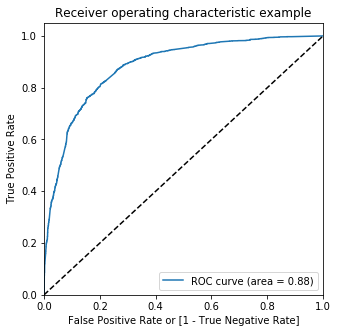

In [141]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

ROC curve as above shows the trade of between senstivity and specificity.<br>
X  axis has true positive rate; Y axis as False positive rate.<br>

As  the ROC curve shows the trade-off between True Positive Rate and False Positive Rate which essentially can also be viewed as a tradeoff between Sensitivity and Specificity. As you can see, on the Y-axis, you have the values of Sensitivity and on the X-axis, you have the value of (1 - Specificity). Notice that in the curve when Sensitivity is increasing, (1 - Specificity), And since, (1 - Specificity) is increasing, it simply means that Specificity is decreasing <br>

By determining the Area under the curve (AUC) of a ROC curve, you can determine how good the model is.The least area that an ROC curve can have is 0.5, and the highest area it can have is 1.

The abive generate ROC curve has an area of 0.88 which can be considered as decent.


# Step 12 Finding Optimal Cutoff Point

An optimal cutoff point is the one which balances the senstivity and specficity.

In [142]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.329506,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.219320,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.362821,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.824296,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.329506,3934,0,1,1,1,1,0,0,0,0,0,0


The above table shows the prediction based on cutoff of 0.1, 0.2, 0.3 etc

<h3> Plotting the accuracy, specificity and sensitivity at different cut off

In [143]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.631571  0.967964  0.424288
0.2   0.2  0.746135  0.917680  0.640430
0.3   0.3  0.785714  0.874696  0.730885
0.4   0.4  0.807359  0.773317  0.828336
0.5   0.5  0.811998  0.707624  0.876312
0.6   0.6  0.806586  0.630981  0.914793
0.7   0.7  0.773191  0.498378  0.942529
0.8   0.8  0.744280  0.382806  0.967016
0.9   0.9  0.699443  0.231955  0.987506


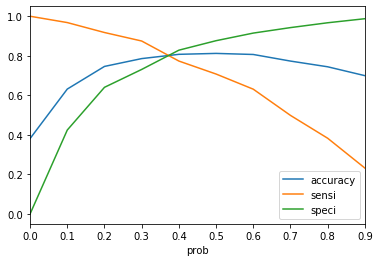

In [144]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<b> From the curve above, 0.4 is the optimum point to take it as a cutoff probability

In the above plot, we can observe that specificity (green line) starts at 0 and goes very high. <br>
While senstivity follows reverse trend it is 1 at the lower end.<br>
Beyong the value of 0.2, the accuracy value is not much changing and anything above this should be convenient.<br>

<b> Hence, when the probability thresholds are very low, the sensitivity is very high and specificity is very low. Similarly, for larger probability thresholds, the sensitivity values are very low but the specificity values are very high. And at about 0.4, the three metrics seem to have decent values  (i.e accuracy 80.7%,sensitivity of 77%,and specificty of 82%) hence, we choose 0.4 as the optimal cut-off point.


<b>Therefore, at about a threshold of 0.4, the curves of accuracy, sensitivity and specificity intersect, and they all take a value of around 77-83%.

Now, in order to assess the model, you need to re-run the predictions on the train set using the cut-off of 0.4

In [145]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.329506,1871,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.219320,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.362821,3516,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.824296,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.329506,3934,0,1,1,1,1,0,0,0,0,0,0,0


In [146]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8073593073593074

In [147]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3315,  687],
       [ 559, 1907]], dtype=int64)

In [148]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [149]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7733171127331712

In [150]:
# Let us calculate specificity
TN / float(TN+FP)

0.828335832083958

In [151]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7351580570547417


In [152]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8557046979865772


<h1> Step 13 Precision and Recall


In [153]:
#checking the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3507,  495],
       [ 721, 1745]], dtype=int64)

<B> Precision- off the things predicted as conversion(1) how many are actuall conversion(1)
TP/TP+FP

In [154]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7790178571428571

<b> Recall- how all the conversion value how many are able to be predict the same = TP/TP+FN

In [155]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7076236820762368

<b> Using sklearn utilities for the same

In [156]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7790178571428571

In [157]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7076236820762368

<h2> Precision and recall tradeoff


In [158]:
from sklearn.metrics import precision_recall_curve

In [159]:
print(y_train_pred_final.Converted, y_train_pred_final.predicted)

0       0
1       0
2       0
3       0
4       0
       ..
6463    1
6464    1
6465    1
6466    0
6467    0
Name: Converted, Length: 6468, dtype: int64 0       0
1       0
2       0
3       1
4       0
       ..
6463    0
6464    1
6465    0
6466    0
6467    0
Name: predicted, Length: 6468, dtype: int64


In [160]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

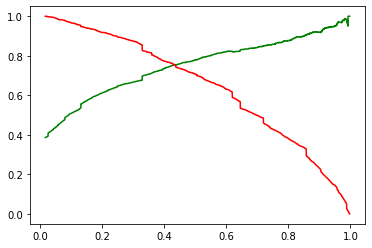

In [161]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Step 13 Making predictions on the test set

In [162]:
X_test[['TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit']])

In [163]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_other_references,Last Activity_Olark Chat Conversation,Last Activity_other_links,What is your current occupation_Working Professional,What is your current occupation_missing,City_Other Cities,Last Notable Activity_SMS Sent,Last Notable Activity_other
4269,1.672735,0.964504,2.149744,0,0,0,0,0,0,0,0,1,1,1,0
2376,-1.122305,-0.885371,-1.225418,0,0,0,0,1,0,0,0,0,1,1,0
7766,0.624595,-0.777416,1.587217,0,1,0,0,0,0,1,1,0,0,0,1
9199,-1.122305,-0.885371,-1.225418,0,0,1,0,0,1,0,0,0,1,0,0
4359,-1.122305,-0.885371,-1.225418,0,0,0,0,1,0,0,0,0,0,0,0


In [164]:
#making prediction on the test set

X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.414947
2376    0.857866
7766    0.691970
9199    0.080414
4359    0.719740
9186    0.559401
1631    0.456504
8963    0.317257
8007    0.027741
5324    0.450142
dtype: float64

In [165]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.414947
2376,0.857866
7766,0.691970
9199,0.080414
4359,0.719740


In [166]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()


,Converted,Lead Number,0
0,1,4269,0.414947
1,1,2376,0.857866
2,1,7766,0.691970
3,0,9199,0.080414
4,1,4359,0.719740


In [167]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,1,4269,0.414947
1,1,2376,0.857866
2,1,7766,0.691970
3,0,9199,0.080414
4,1,4359,0.719740


In [168]:
y_pred_final['predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

y_pred_final.head()

,Converted,Lead Number,Converted_Prob,predicted
0,1,4269,0.414947,1
1,1,2376,0.857866,1
2,1,7766,0.691970,1
3,0,9199,0.080414,0
4,1,4359,0.719740,1


In [169]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted)

0.8041125541125541

In [170]:
#confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.predicted )
confusion2

array([[1384,  293],
       [ 250,  845]], dtype=int64)

In [171]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [172]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.771689497716895

In [173]:
# Let us calculate specificity
TN / float(TN+FP)

0.8252832438878951

## Step 14: Calculating the Lead score 

In [174]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,Converted,Lead Number,Converted_Prob,predicted
0,1,4269,0.414947,1
1,1,2376,0.857866,1
2,1,7766,0.691970,1
3,0,9199,0.080414,0
4,1,4359,0.719740,1


In [175]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.329506,1871,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.219320,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.362821,3516,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.824296,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.329506,3934,0,1,1,1,1,0,0,0,0,0,0,0


In [176]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['Lead Number','Converted','Converted_Prob','predicted']]
leads_train_pred.head()

,Lead Number,Converted,Converted_Prob,predicted
0,1871,0,0.329506,0
1,6795,0,0.219320,0
2,3516,0,0.362821,0
3,8105,0,0.824296,1
4,3934,0,0.329506,0


In [177]:

# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.329506,1871,0
1,0,0.219320,6795,0
2,0,0.362821,3516,0
3,0,0.824296,8105,1
4,0,0.329506,3934,0


In [178]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6468, 4)
(2772, 4)
(9240, 4)


In [179]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,Converted,Converted_Prob,Lead Number,predicted,Lead_Score
0,0,0.329506,1871,0,33
1,0,0.219320,6795,0,22
2,0,0.362821,3516,0,36
3,0,0.824296,8105,1,82
4,0,0.329506,3934,0,33


# Conclusion

In our model, 15 features have been used by our model to successfully predict if a lead will get converted or not.
 The Coefficient (beta) values for each of these features from the model parameters are used to determine the order of
importance of these features.
 Features with high positive beta values are the ones that contribute most towards the probability of a lead getting converted.
Similarly, features with high negative beta values contribute the least.

a) Working professional (from what is the current occupation)
b) Other_References (from Lead Source)
c) Others Activity (from the Lead Notable Activity)

On the actual Train model in the prior steps, we got the model with high accuracy (=80%) and sensitivity (=77)

Now on the Test model, we have an accuracy of 80.4%.And sensitivity of the test model is 77% . 